<a href="https://colab.research.google.com/github/Elcejas77/Ejercicios/blob/main/Taller3_teoriadese%C3%B1ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Se importan las Libreria

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

##Se importan los Datos del precio de celulares y sus diferentes caracteristica

In [18]:
df=pd.read_csv('/content/cellphones data.csv')
df.head(10)                                   ##Se muestran las 10 primeras filas del dataframe

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,24/09/2021
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,24/09/2021
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2021
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,24/09/2021
5,5,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018
6,6,Asus,Zenfone 8,Android,128,8,6.76,64,12,4000,5.9,169,599,12/05/2021
7,7,Samsung,Galaxy A13,Android,32,3,1.36,50,8,5000,6.6,196,154,23/03/2022
8,8,Samsung,Galaxy A32,Android,64,4,2.20,48,13,5000,6.5,205,199,22/01/2021
9,9,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2022


##Gráfica de Variables

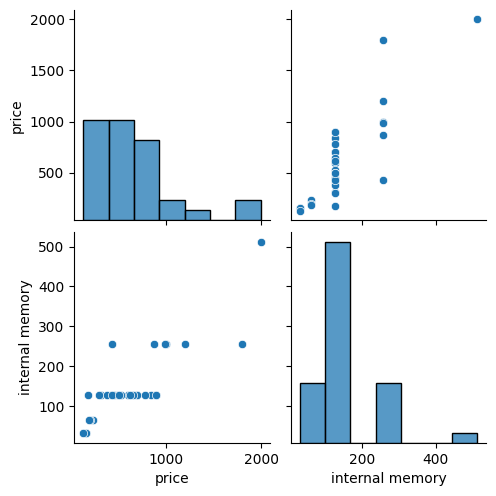

In [22]:
df = df.loc[:, ['price','internal memory']]          #se seleccionan solo esas columnas para realizar el pairplot
sns.pairplot(df)
plt.show()

## Data splitting

In [24]:
X = df['price'].values.reshape(-1,1)              #Datos conocidos
y = df['internal memory'].values.reshape(-1,1)                #Se va a estimar el precio en función de la bateria

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)        #Se definen los datos de entreno, prueba

## Preselecciono un modelo usando k-fold

In [25]:
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


regression = [SVR(),ElasticNet(),DecisionTreeRegressor(), RandomForestRegressor()]            #Se preseleccionan 4 diferentes modelos de regresión y se evaluará cual funciona mejor

score_matrix = [['SVR',0,0],
                ['ElasticNet',0,0],
                ['Tree',0,0],
                ['Forest',0,0]
]

In [26]:
from sklearn.model_selection import cross_val_score, KFold

i = 0

K = KFold(n_splits=10,shuffle=False)

for model in regression:
    scores = cross_val_score(estimator=model, X = X_train, y = y_train, cv = K)
    score_matrix[i][1] = scores.mean()
    score_matrix[i][2] = scores.std()
    i+=1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [27]:
score_matrix

[['SVR', -0.9498334728897969, 1.1087266227203671],
 ['ElasticNet', -0.055142362348373816, 0.8235667474330415],
 ['Tree', -0.6153061224489795, 1.660853704295491],
 ['Forest', -0.26142143990929695, 0.9515570789493951]]

## Escojo el mejor modelo de Regresión y lo entreno

Por favor da click en el link si deseas saber sobre el modelo seleccionado

[Regresión por arboles de desicción](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)

In [28]:
model =DecisionTreeRegressor()          #se seleccionó el modelo de regresión lineal decisiontreeRegressor porque fue el que mejor se ajustó
model.fit(X_train, y_train)             #Se entrena el modelo por medio de los datos de battery y Price

DecisionTreeRegressor()

In [29]:
y_pred = model.predict(X_test)          #Por medio de lo que aprendió el modelo se hace la predicción con los datos que no conoce
print(np.shape(y_pred))
print(np.shape(X_test))

(11,)
(11, 1)


In [30]:
R=r2_score(y_test, y_pred)            #Se verifica el índice de correlación evaluar el rendimiento
print(R)


0.44654088050314467


##Gráfico de dispersión de los datos (reales y estimados)

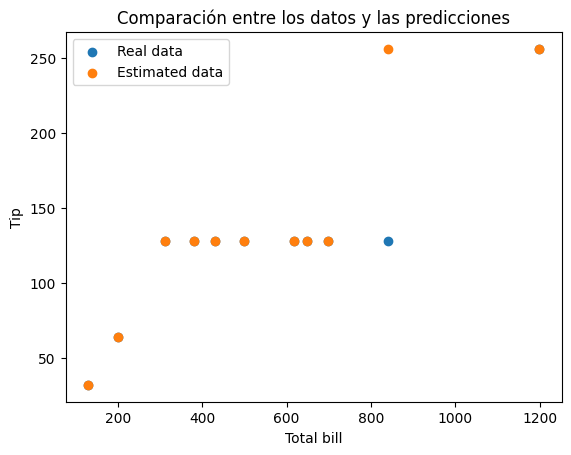

In [31]:
plt.scatter(X_test,y_test, label='Real data')
plt.scatter(X_test, y_pred, label='Estimated data')
plt.legend()
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.title("Comparación entre los datos y las predicciones")
plt.show()